In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
dataset = pd.read_csv('combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

In [21]:
dataset['Rating'] = dataset['Rating'].astype(float)

In [22]:
dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [23]:
dataset.shape

(24058263, 2)

In [30]:
dataset.head(20)

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
5,823519,3.0
6,893988,3.0
7,124105,4.0
8,1248029,3.0
9,1842128,4.0


In [24]:
p = dataset.groupby('Rating')['Rating'].agg(['count'])

In [26]:
p

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [27]:
movie_count = dataset.isnull().sum()[1]

movie_count

4499

In [29]:
cust_count = dataset['Cust_Id'].nunique()-movie_count
cust_count

470758

In [30]:
rating_count = dataset['Cust_Id'].count() - movie_count

rating_count

24053764

Text(0.5, 1.0, 'Total pool: 4499 Movies, 470758 customers, 24053764 ratings given')

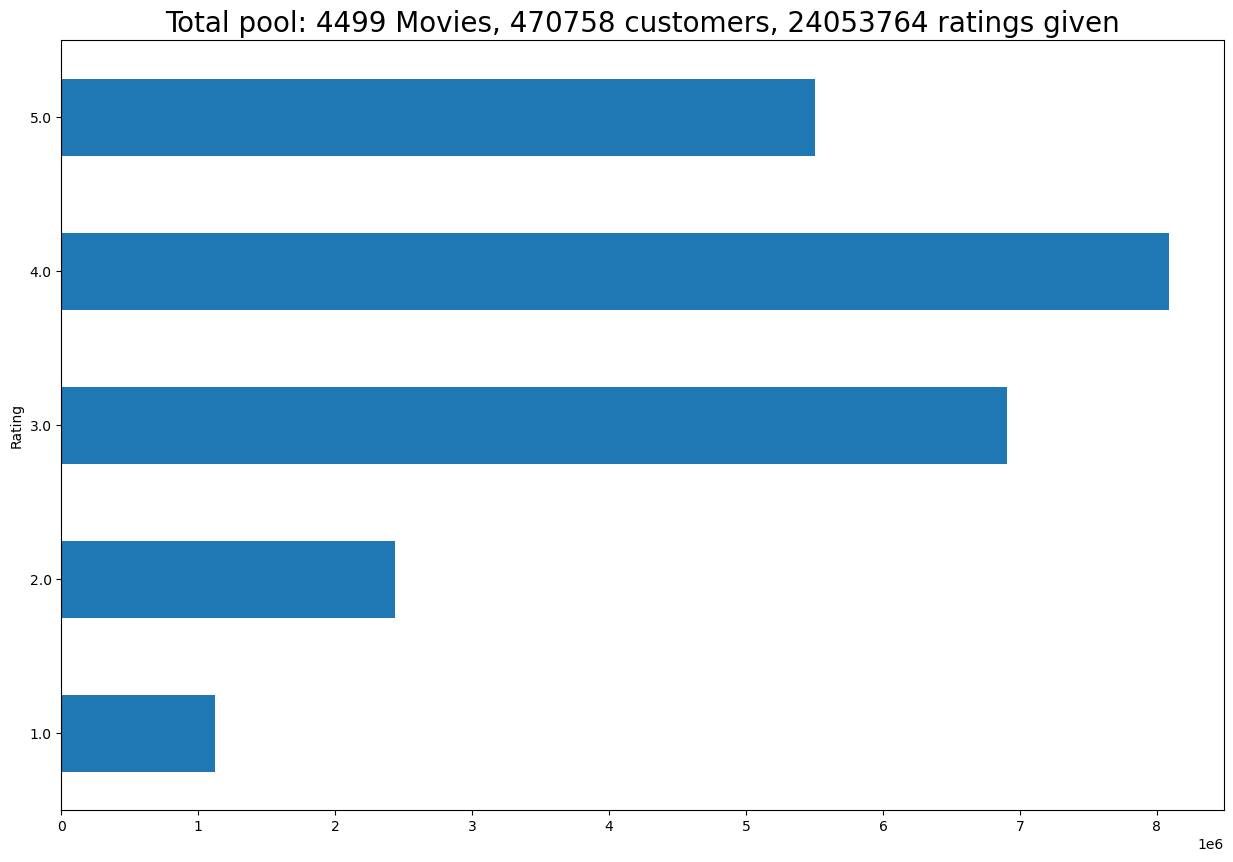

In [23]:
ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title(f'Total pool: {movie_count} Movies, {cust_count} customers, {rating_count} ratings given', fontsize=20)

In [12]:
df_nan = pd.DataFrame(pd.isnull(dataset.Rating))

In [13]:
df_nan.head()

,Rating
1,False
2,False
3,False
4,False
5,False


In [14]:
df_nan = df_nan[df_nan['Rating'] == True]

In [16]:
df_nan.shape

(0, 1)

In [17]:
df_nan = df_nan.reset_index()

In [18]:
df_nan.head(5)

,index,Rating


In [11]:
movie_np = []
movie_id = 1
for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

last_record = np.full((1,len(dataset) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

NameError: name 'df_nan' is not defined

In [10]:
dataset = dataset[pd.notnull(dataset['Rating'])]#movies count so nan
dataset['Movie_Id'] = movie_np.astype(int)
dataset['Cust_Id'] =dataset['Cust_Id'].astype(int)
print('-Dataset examples-')
dataset.head()

NameError: name 'movie_np' is not defined

In [ ]:
dataset.shape

In [ ]:
f = ['count','mean']

In [ ]:
dataset_movie_summary = dataset.groupby('Movie_Id')['Rating'].agg(f)

dataset_movie_summary.index = dataset_movie_summary.index.map(int)

movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7),0)

drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

In [ ]:
dataset_cust_summary = dataset.groupby('Cust_Id')['Rating'].agg(f) #mean and count of customer id
dataset_cust_summary.index = dataset_cust_summary.index.map(int) #integer format
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index
#                                           6                       <  5
#drop_cust_list[3,4]
print(f'Customer minimum times of review: {cust_benchmark}')



In [8]:
print(f'Original Shape: {dataset.shape}')

Original Shape: (24058263, 2)


In [9]:
dataset = dataset[~dataset['Movie_Id'].isin(drop_movie_list)]
#in dataset --->in all movie ids------>if the whic ever  movies we put under drop list are present or not---
#if present drop /remove them
dataset = dataset[~dataset['Cust_Id'].isin(drop_cust_list)]
#removing all inactive users from our dataset
print('After Trim Shape: {}'.format(dataset.shape))

KeyError: 'Movie_Id'